<a href="https://colab.research.google.com/github/engineerjkk/implementing-Papers/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

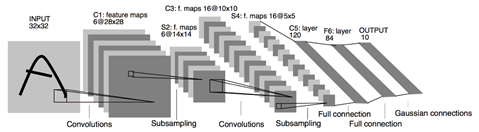

## 1. import Module

In [ ]:
import tensorflow as tf

In [ ]:
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
import cv2

In [ ]:
image = train_x[0]

In [ ]:
# 이미지 shape 확인
image.shape

(28, 28)

* 차원 수를 확인 
* MNIST의 데이터는 [batch size,height,width,channel]=[60000,28,28,1] 이었다.

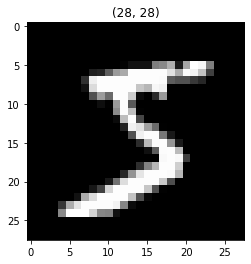

In [ ]:
plt.title(image.shape)
plt.imshow(image,'gray')
plt.show()

# <font color='blue'>2. Input -> C1 Convolutions</font>   

In [ ]:
# 차원 수 높이기 
image = image[tf.newaxis, ..., tf.newaxis]

In [ ]:
image.shape

(1, 28, 28, 1)

filters: layer에서 나갈 때 몇 개의 filter를 만들 것인지 (a.k.a weights, filters, channels)  
kernel_size: filter(Weight)의 사이즈  
strides: 몇 개의 pixel을 skip 하면서 훑어지나갈 것인지 (사이즈에도 영향을 줌)  
padding: zero padding을 만들 것인지. VALID는 Padding이 없고, SAME은 Padding이 있음 (사이즈에도 영향을 줌)  
activation: Activation Function을 만들것인지. 당장 설정 안해도 Layer층을 따로 만들 수 있음

- tf.keras.layers.Conv2D
- integer의 경우 모델에 들어가면 에러가나므로 float32로 변경해준다.

In [ ]:
image = tf.cast(image, dtype=tf.float32)

In [ ]:
layer = tf.keras.layers.Conv2D(filters=6,kernel_size=(5,5), strides=(1, 1), padding='SAME')#,activation='tanh')
output = layer(image)

In [ ]:
import numpy as np
np.min(image),np.max(image)

(0.0, 255.0)

In [ ]:
np.min(output),np.max(output)

(-311.0677, 160.24718)

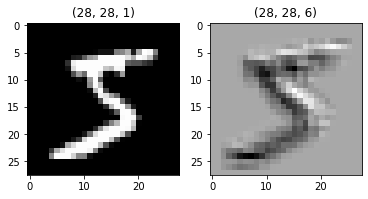

In [ ]:
plt.subplot(1,2,1)
plt.title(image[0,:,:,:].shape)
plt.imshow(image[0,:,:,0],'gray')
plt.subplot(1,2,2)
plt.title(output[0,:,:,:].shape)
plt.imshow(output[0,:,:,0],'gray')
plt.show()

weight 불러오기

- layer.get_weights()

앞에는 weight, 뒤에는 bias이다.

In [ ]:
weight=layer.get_weights()
len(weight)

2

In [ ]:
weight[0].shape,weight[1].shape

((5, 5, 1, 6), (6,))

In [ ]:
weight[0].shape

(5, 5, 1, 6)

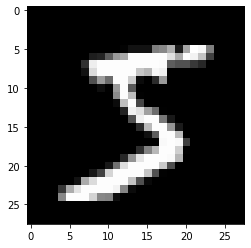

In [ ]:
plt.imshow(image[0,:,:,0],'gray')
plt.show()

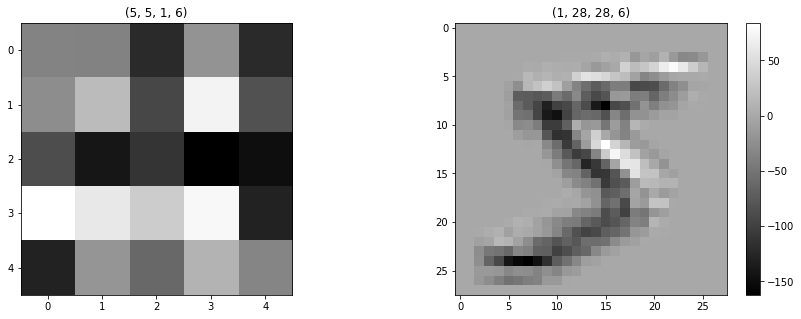

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0], 'gray')
plt.subplot(122)
plt.title(output.shape)
plt.imshow(output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

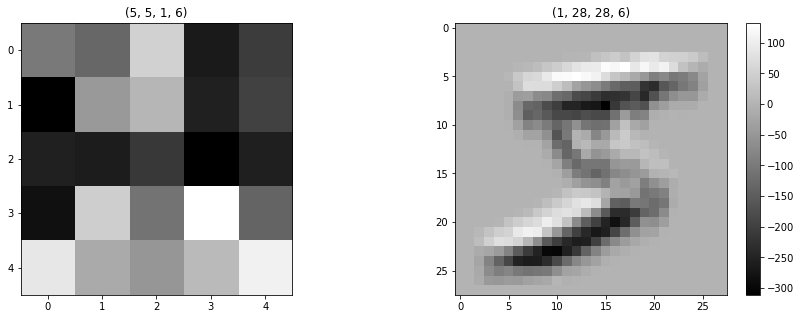

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,5], 'gray')
plt.subplot(122)
plt.title(output.shape)
plt.imshow(output[0,:,:,5], 'gray')
plt.colorbar()
plt.show()

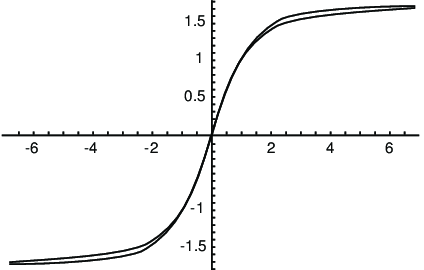

- The popular hyperbolic tangent activation function y ← 1.7159 tanh( 2 3 y) can be approximated by a pair of circular nodes where the activation of the second node y q is fixed at √ 1.9443 and the activation of the first node is calculated accordingly y p ← 1.7159yp/ y 2 p + 1.9443.

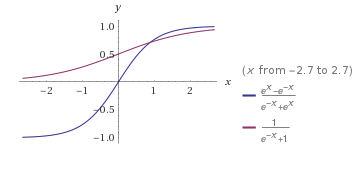

In [ ]:
act_output=tf.keras.activations.tanh(output)

In [ ]:
act_output.shape

TensorShape([1, 28, 28, 6])

In [ ]:
np.min(output), np.max(output)

(-311.0677, 160.24718)

In [ ]:
np.min(act_output), np.max(act_output)

(-1.0, 1.0)

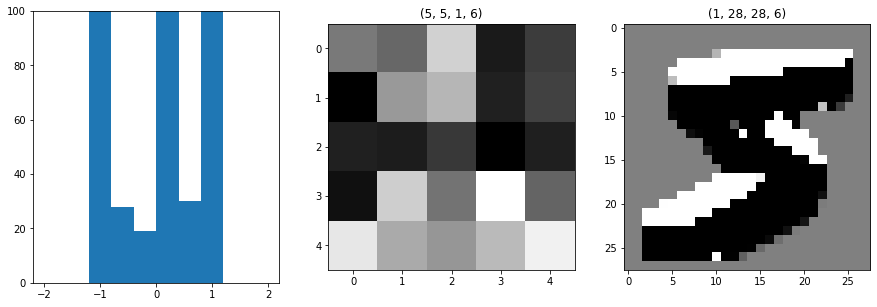

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(act_output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,5], 'gray')
plt.subplot(133)
plt.title(act_output.shape)
plt.imshow(act_output[0,:,:,5], 'gray')
plt.show()

activation을 tanh를 썼기 때문에 텐서를 받으면 -1~1 사이의 값으로 모두 변환된다.

# <font color='blue'>3. C1 -> S2 Subsampling</font>   

- tf.keras.layers.AveragePool2D

In [ ]:
layer = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='VALID')
output = layer(act_output)

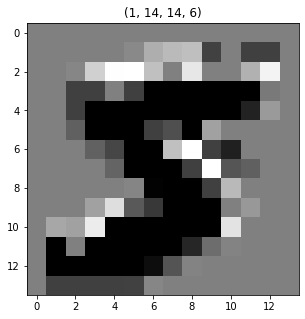

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title(output.shape)
plt.imshow(output[0, :, :, 0], 'gray')

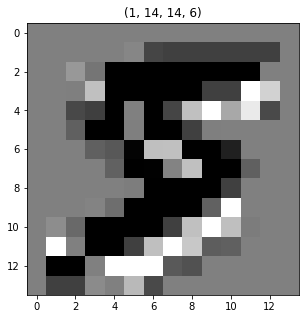

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title(output.shape)
plt.imshow(output[0, :, :, 1], 'gray')


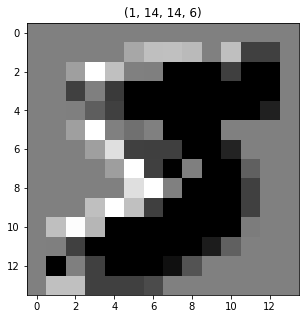

In [ ]:
plt.figure(figsize=(15, 5))

plt.title(output.shape)
plt.imshow(output[0, :, :, 2], 'gray')


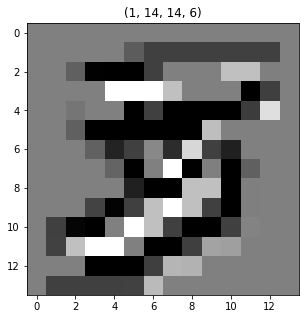

In [ ]:

plt.figure(figsize=(15, 5))

plt.title(output.shape)
plt.imshow(output[0, :, :, 3], 'gray')

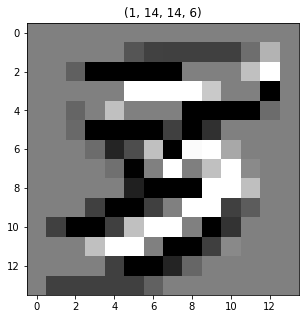

In [ ]:
plt.figure(figsize=(15, 5))
plt.title(output.shape)
plt.imshow(output[0, :, :, 4], 'gray')

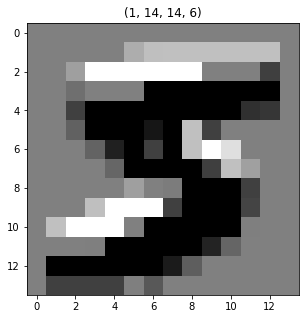

In [ ]:
plt.figure(figsize=(15, 5))
plt.title(output.shape)
plt.imshow(output[0, :, :, 5], 'gray')

# <font color='blue'>4. S2 -> C3 Convoltions</font>   

C3filter0 = (S2filter0 matrix +S2filter1 matrix +S2filter2 matrix) -> tanh

In [ ]:
def convolution(m,f,s=1): 
  import numpy as np 
  mx,my=np.shape(m) 
  fx,fy=np.shape(f) 
  if (mx-fx)%s==0 and (my-fy)%s==0: 
    print('convolution 연산 가능') 
  else: 
    print('convolution 연산 불가능') 
    print('(mx-fx)%s=',(mx-fx)%s) 
    print('(my-fy)%s=',(my-fy)%s) 
    return 
  o=[] 
  for i in range(0,mx-fx+1,s): 
    for j in range(0,my-fy+1,s): 
      o.append((m[i:i+fx,j:j+fy]*f).sum())
  ow=int((mx-fx)/s)+1 
  oh=int((my-fy)/s)+1 
  #print('ouptput 크기=(%s,%s)'%(ow,oh)) 
  o=np.array(o).reshape(oh,ow) 
  return o 

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

In [ ]:
output.shape

TensorShape([1, 14, 14, 6])

In [ ]:
for i in range(0,6):
  globals()['S2filter{}'.format(i)]=convolution(output[0, :, :, i].numpy(),weight[0][:,:,0,i],s=1)

convolution 연산 가능
convolution 연산 가능
convolution 연산 가능
convolution 연산 가능
convolution 연산 가능
convolution 연산 가능


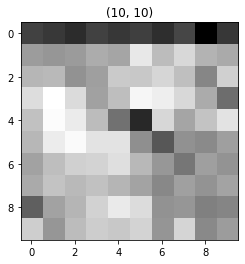

In [ ]:
plt.title(S2filter0.shape)
plt.imshow(S2filter0, 'gray')

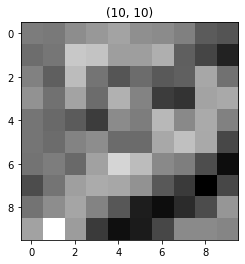

In [ ]:
plt.title(S2filter1.shape)
plt.imshow(S2filter1, 'gray')



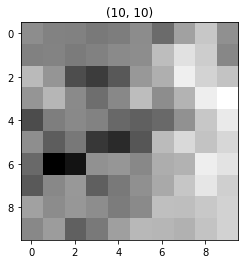

In [ ]:
plt.title(S2filter2.shape)
plt.imshow(S2filter2, 'gray')

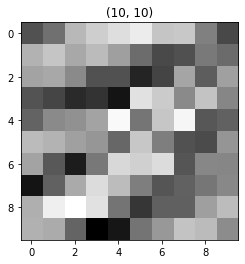

In [ ]:
plt.title(S2filter3.shape)
plt.imshow(S2filter3, 'gray')

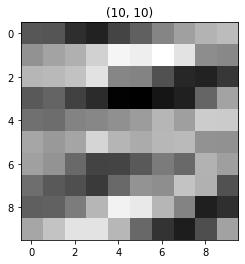

In [ ]:

plt.title(S2filter4.shape)
plt.imshow(S2filter4, 'gray')

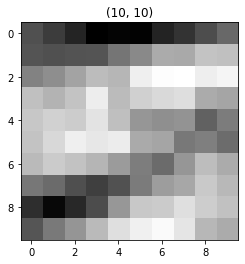

In [ ]:

plt.title(S2filter5.shape)
plt.imshow(S2filter5, 'gray')

tanh

In [ ]:
def tanh(x):
    return (np.exp(x/2)-np.exp(-x/2))/(np.exp(x/2)+np.exp(-x/2))

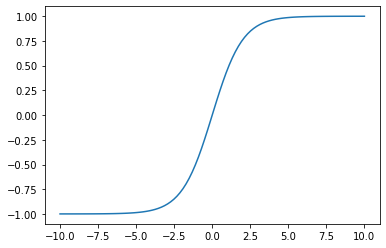

In [ ]:
x = np.linspace(-10,10,100)
y = []
for dig in x:
    y.append(tanh(dig))
plt.plot(x,np.reshape(y,(100,)))
plt.show()

In [ ]:
C3filter0 = tanh(S2filter0 +S2filter1+S2filter2)
C3filter1 = tanh(S2filter1 +S2filter2+S2filter3)
C3filter2 = tanh(S2filter2 +S2filter3+S2filter4)
C3filter3 = tanh(S2filter3 +S2filter4+S2filter5)
C3filter4 = tanh(S2filter0 +S2filter4+S2filter5)
C3filter5 = tanh(S2filter0 +S2filter1+S2filter5)
C3filter6 = tanh(S2filter0 +S2filter1+S2filter2+S2filter3)
C3filter7 = tanh(S2filter1 +S2filter2+S2filter3+S2filter4)
C3filter8 = tanh(S2filter2 +S2filter3+S2filter4+S2filter5)
C3filter9 = tanh(S2filter0 +S2filter3+S2filter4+S2filter5)
C3filter10 = tanh(S2filter0 +S2filter1+S2filter4+S2filter5)
C3filter11 = tanh(S2filter0 +S2filter1+S2filter2+S2filter5)
C3filter12= tanh(S2filter0 +S2filter1+S2filter3+S2filter4)
C3filter13 = tanh(S2filter1 +S2filter2+S2filter4+S2filter5)
C3filter14 = tanh(S2filter0 +S2filter2+S2filter3+S2filter5)
C3filter15 = tanh(S2filter0 +S2filter1+S2filter2+S2filter3+S2filter4+S2filter5)

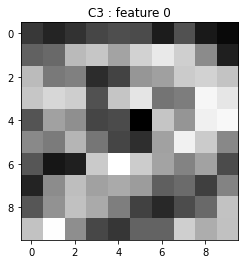

In [ ]:
plt.title('C3 : feature 0')
plt.imshow(C3filter0, 'gray')

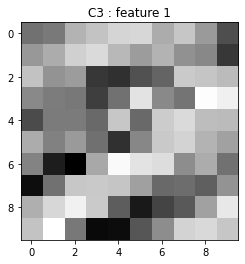

In [ ]:
plt.title('C3 : feature 1')
plt.imshow(C3filter1, 'gray')

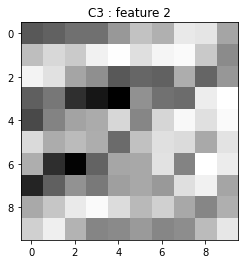

In [ ]:
plt.title('C3 : feature 2')
plt.imshow(C3filter2, 'gray')

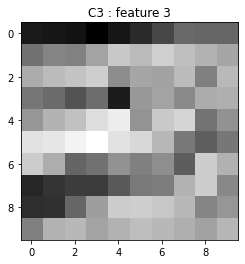

In [ ]:
plt.title('C3 : feature 3')
plt.imshow(C3filter3, 'gray')

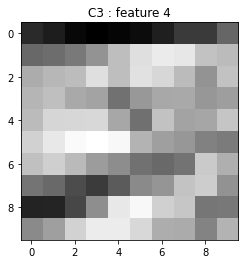

In [ ]:
plt.title('C3 : feature 4')
plt.imshow(C3filter4, 'gray')

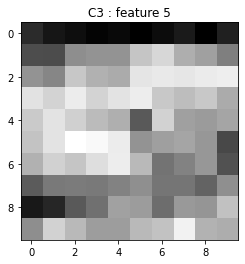

In [ ]:
plt.title('C3 : feature 5')
plt.imshow(C3filter5, 'gray')

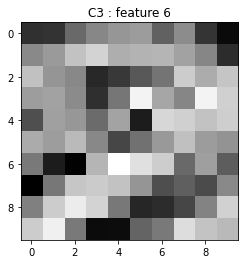

In [ ]:
plt.title('C3 : feature 6')
plt.imshow(C3filter6, 'gray')

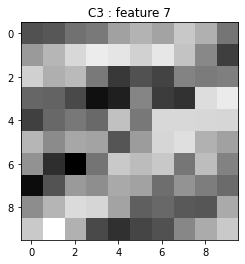

In [ ]:
plt.title('C3 : feature 7')
plt.imshow(C3filter7, 'gray')

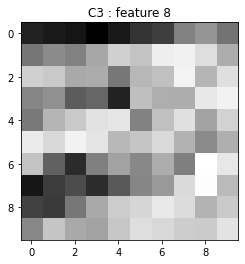

In [ ]:
plt.title('C3 : feature 8')
plt.imshow(C3filter8, 'gray')

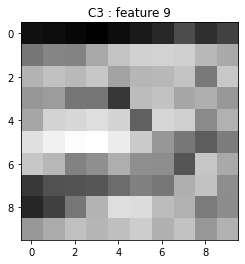

In [ ]:
plt.title('C3 : feature 9')
plt.imshow(C3filter9, 'gray')

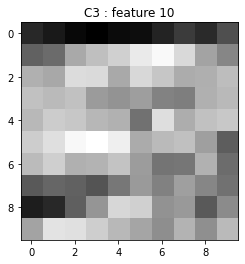

In [ ]:
plt.title('C3 : feature 10')
plt.imshow(C3filter10, 'gray')

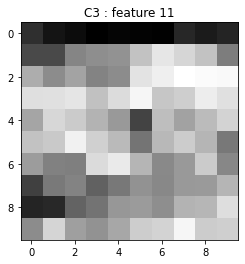

In [ ]:
plt.title('C3 : feature 11')
plt.imshow(C3filter11, 'gray')

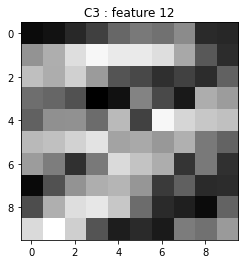

In [ ]:
plt.title('C3 : feature 12')
plt.imshow(C3filter12, 'gray')

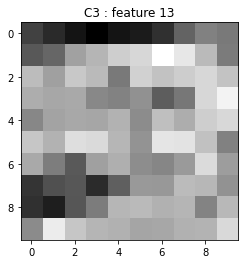

In [ ]:
plt.title('C3 : feature 13')
plt.imshow(C3filter13, 'gray')

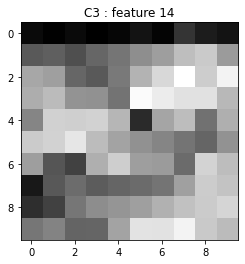

In [ ]:
plt.title('C3 : feature 14')
plt.imshow(C3filter14, 'gray')

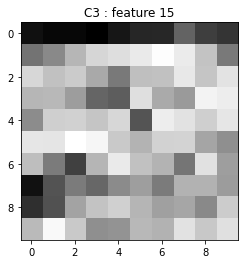

In [ ]:
plt.title('C3 : feature 15')
plt.imshow(C3filter15, 'gray')

차원 수를 맞춰주기 위함

In [ ]:
for i in range(0,16):
  globals()['C3filter{}'.format(i)]=globals()['C3filter{}'.format(i)][tf.newaxis, ..., tf.newaxis]

In [ ]:
featureMap=np.concatenate((C3filter0, C3filter1,C3filter2,C3filter3,C3filter4,C3filter5,C3filter6,C3filter7,C3filter8,C3filter9,C3filter10,C3filter11,C3filter12,C3filter13,C3filter14,C3filter15), axis=3)

In [ ]:
featureMap.shape

(1, 10, 10, 16)

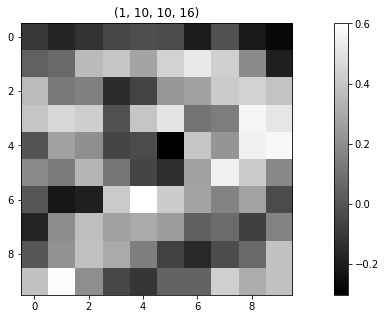

In [ ]:
plt.figure(figsize=(15, 5))
plt.title(featureMap.shape)
plt.imshow(featureMap[0, :, :, 0], 'gray')
plt.colorbar()
plt.show()

따라서 각 필터연산된 feature map을 모두 연산한 뒤에 다음레이어에 들어갈때 그 matrix에 activation function을 각 픽셀마다 곱해 연산해주는 것이다.
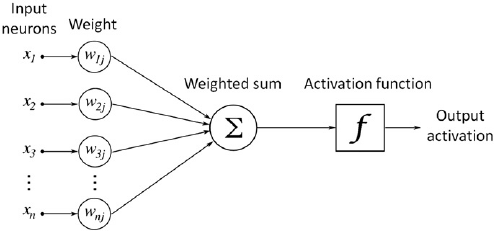

# <font color='blue'>5. C3 -> S4 : Subsampling</font>   

In [ ]:
layer = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='VALID')
output = layer(featureMap)

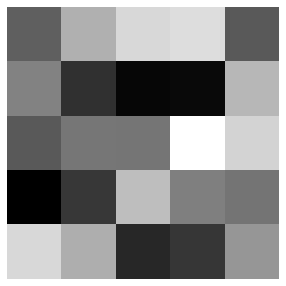

In [ ]:
plt.figure(figsize=(15, 5))
#plt.title(output.shape)
plt.axis('off')
plt.imshow(output[0, :, :, 7], 'gray')
plt.show()

# 6. Classifier (Fully Connected Layer)

- tf.keras.layers.Flatten()

In [ ]:
layer = tf.keras.layers.Flatten()
output = layer(output)

In [ ]:
output.shape

TensorShape([1, 400])

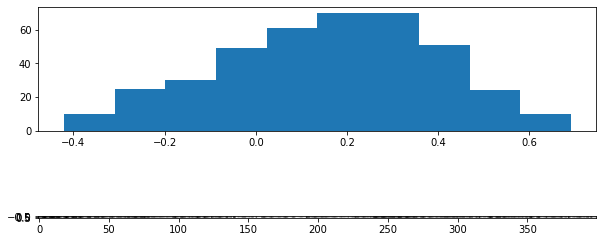

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:400],'gray')
plt.show()

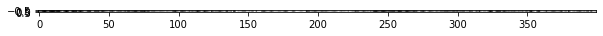

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(output[:,:400],'gray')
plt.show()

내보낼 유닛 개수를 120개로 설정하고 이 120개와 S4의 feature map 모두 연결한다는 뜻이된다.

In [ ]:
layer = tf.keras.layers.Dense(120, activation='tanh')
output = layer(output)

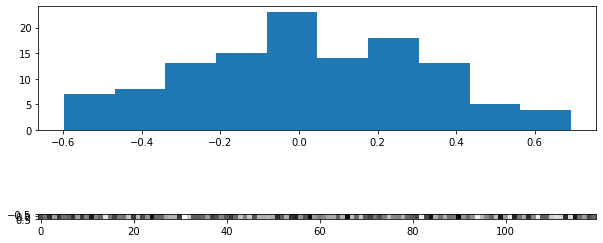

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:120],'gray')
plt.show()

In [ ]:
layer = tf.keras.layers.Dense(84, activation='tanh')
output = layer(output)

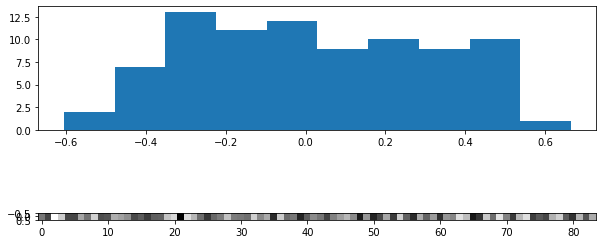

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:84],'gray')
plt.show()

In [ ]:
layer = tf.keras.layers.Dense(10, activation='softmax')
output = layer(output)

<font color='red'>RBF가 아닌 softmax 주의</font> 

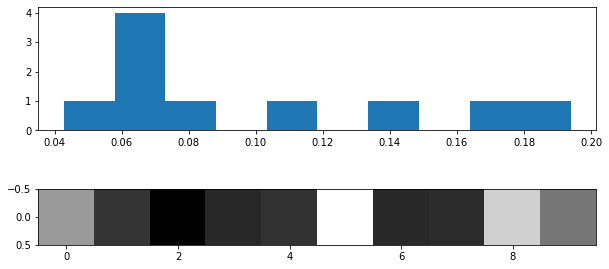

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:10],'gray')
plt.show()

가장 확률 높은값 찾기

In [ ]:
output

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.13398242, 0.07399851, 0.04276639, 0.06752071, 0.07273757,
        0.19405209, 0.06658181, 0.06927752, 0.16609399, 0.11298903]],
      dtype=float32)>

In [ ]:
result=np.argmax(output)
result

5

# 7. Build Model

In [ ]:
from tensorflow.keras import layers

In [ ]:
input_shape = (28, 28, 1)

In [ ]:
inputs = layers.Input(input_shape)
#32는 필터개수 
#feature extraction이며, 여기서는 전부 연결헀고 끝에 Dropout을 설정해줬다.
net = layers.Conv2D(6, (5, 5), padding='SAME')(inputs)
net = layers.Activation('tanh')(net)
net = layers.AveragePooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net) #LeNet Table 묘사
net = layers.Conv2D(16, (5, 5), padding='VALID')(net)
net = layers.Activation('tanh')(net)
net = layers.AveragePooling2D(pool_size=(2, 2))(net)

net = layers.Flatten()(net)
net = layers.Dense(120)(net)
net = layers.Activation('tanh')(net)

net = layers.Dense(84)(net)
net = layers.Activation('tanh')(net)

net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='CVandAR')

In [ ]:
model.summary()

Model: "CVandAR"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 activation (Activation)     (None, 28, 28, 6)         0         
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        2416      
                                                           

 # 8. Training

In [ ]:
epochs = 100
batch_size = 200

hist = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(test_x, test_y))
val_loss = hist.history['val_loss']
val_acc = hist.history['val_acc']

font_name = matplotlib.font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
matplotlib.rc('font', family=font_name)

fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epochs), val_acc, label='정확도(%)', color='darkred')
plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
ax_acc.grid(linestyle='--', color='lavender')

plt.show()

Epoch 1/100
300/300 [==============================] - 3s 8ms/step - loss: 0.4583 - accuracy: 0.8661 - val_loss: 0.1831 - val_accuracy: 0.9459
Epoch 2/100
300/300 [==============================] - 2s 7ms/step - loss: 0.1817 - accuracy: 0.9456 - val_loss: 0.1176 - val_accuracy: 0.9638
Epoch 3/100
300/300 [==============================] - 2s 7ms/step - loss: 0.1272 - accuracy: 0.9608 - val_loss: 0.0920 - val_accuracy: 0.9705
Epoch 4/100
300/300 [==============================] - 2s 7ms/step - loss: 0.0992 - accuracy: 0.9691 - val_loss: 0.0763 - val_accuracy: 0.9766
Epoch 5/100
300/300 [==============================] - 2s 7ms/step - loss: 0.0866 - accuracy: 0.9720 - val_loss: 0.0655 - val_accuracy: 0.9807
Epoch 6/100
300/300 [==============================] - 2s 7ms/step - loss: 0.0721 - accuracy: 0.9775 - val_loss: 0.0596 - val_accuracy: 0.9818
Epoch 7/100
300/300 [==============================] - 2s 7ms/step - loss: 0.0642 - accuracy: 0.9797 - val_loss: 0.0536 - val_accuracy: 0.9839

KeyError: ignored

In [ ]:
hist.history

{'accuracy': [0.8661166429519653,
  0.9455666542053223,
  0.9607999920845032,
  0.9691333174705505,
  0.9719666838645935,
  0.9775166511535645,
  0.9797499775886536,
  0.9806833267211914,
  0.9822166562080383,
  0.9836166501045227,
  0.9852666854858398,
  0.9862333536148071,
  0.9857666492462158,
  0.9875333309173584,
  0.9885666370391846,
  0.9883166551589966,
  0.9901166558265686,
  0.9890666604042053,
  0.9898166656494141,
  0.9894833564758301,
  0.9907000064849854,
  0.9916333556175232,
  0.9908999800682068,
  0.9908499717712402,
  0.9917166829109192,
  0.9919499754905701,
  0.9916166663169861,
  0.9926000237464905,
  0.992900013923645,
  0.993066668510437,
  0.992816686630249,
  0.9933500289916992,
  0.9941166639328003,
  0.9935166835784912,
  0.9937333464622498,
  0.9942166805267334,
  0.9934333562850952,
  0.9943166375160217,
  0.9943166375160217,
  0.9936666488647461,
  0.9937833547592163,
  0.994616687297821,
  0.994700014591217,
  0.994700014591217,
  0.995199978351593,
  0.9

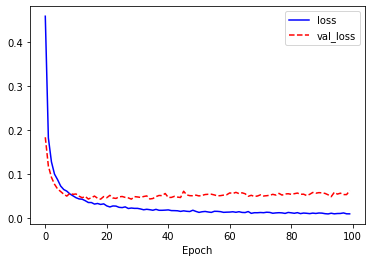

In [ ]:
## Plot losses
plt.plot(hist.history['loss'],'-b',label='loss')
plt.plot(hist.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

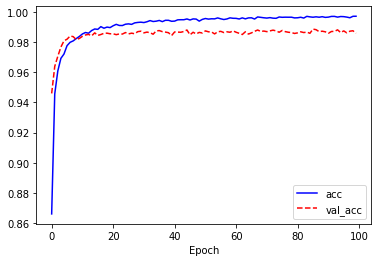

In [ ]:
## Plot Accuracy
plt.plot(hist.history['accuracy'],'b-',label='acc')
plt.plot(hist.history['val_accuracy'],'r--',label='val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_x, test_y, batch_size=batch_size)

50/50 [==============================] - 0s 4ms/step - loss: 0.0617 - accuracy: 0.9857


[0.061696168035268784, 0.9857000112533569]

# 9. Appendix

Optimizer and Traning

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 

In [ ]:
input_shape = (28, 28, 1)
num_classes = 10

learning_rate = 0.001

In [ ]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [ ]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

train_x = train_x / 255.
test_x = test_x / 255.

DropOut

- tf.keras.layers.Dropout

In [ ]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)

In [ ]:
output.shape

TensorShape([1, 10])

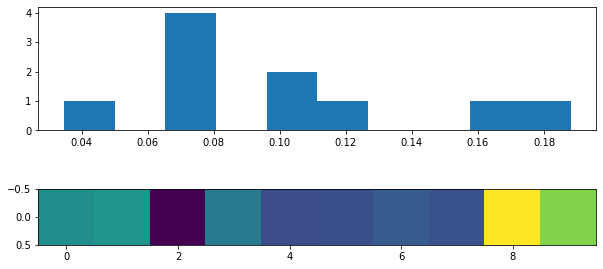

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(output.numpy().ravel())
plt.subplot(212)
plt.imshow(output[:,:100])
plt.show()

다른 CNN 모델 학습

In [ ]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.5)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [ ]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [ ]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

train_x = train_x / 255.
test_x = test_x / 255.

In [ ]:
epochs = 100
batch_size = 200

hist = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(test_x, test_y))
val_loss = hist.history['val_loss']
val_acc = hist.history['val_acc']

font_name = matplotlib.font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
matplotlib.rc('font', family=font_name)

fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epochs), val_acc, label='정확도(%)', color='darkred')
plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
ax_acc.grid(linestyle='--', color='lavender')

plt.show()

Epoch 1/100
300/300 [==============================] - 9s 29ms/step - loss: 0.3049 - accuracy: 0.9007 - val_loss: 0.0479 - val_accuracy: 0.9846
Epoch 2/100
300/300 [==============================] - 9s 29ms/step - loss: 0.0884 - accuracy: 0.9728 - val_loss: 0.0303 - val_accuracy: 0.9889
Epoch 3/100
300/300 [==============================] - 8s 28ms/step - loss: 0.0676 - accuracy: 0.9797 - val_loss: 0.0264 - val_accuracy: 0.9908
Epoch 4/100
300/300 [==============================] - 9s 29ms/step - loss: 0.0556 - accuracy: 0.9830 - val_loss: 0.0235 - val_accuracy: 0.9926
Epoch 5/100
300/300 [==============================] - 8s 28ms/step - loss: 0.0487 - accuracy: 0.9849 - val_loss: 0.0203 - val_accuracy: 0.9930
Epoch 6/100
300/300 [==============================] - 9s 29ms/step - loss: 0.0410 - accuracy: 0.9874 - val_loss: 0.0202 - val_accuracy: 0.9929
Epoch 7/100
300/300 [==============================] - 8s 28ms/step - loss: 0.0399 - accuracy: 0.9878 - val_loss: 0.0197 - val_accuracy:

KeyError: ignored

In [ ]:
hist.history

{'accuracy': [0.9006833434104919,
  0.9728333353996277,
  0.9796500205993652,
  0.9829999804496765,
  0.9848666787147522,
  0.9874333143234253,
  0.9878000020980835,
  0.9893333315849304,
  0.9897333383560181,
  0.9908166527748108,
  0.9907833337783813,
  0.9912833571434021,
  0.9916499853134155,
  0.9923999905586243,
  0.9923499822616577,
  0.9929500222206116,
  0.9926499724388123,
  0.9931666851043701,
  0.9930333495140076,
  0.9936333298683167,
  0.9943000078201294,
  0.9942166805267334,
  0.9940666556358337,
  0.994533360004425,
  0.9943000078201294,
  0.9947999715805054,
  0.9947666525840759,
  0.9944999814033508,
  0.9951666593551636,
  0.9954666495323181,
  0.9949666857719421,
  0.9941999912261963,
  0.9956333041191101,
  0.9956499934196472,
  0.9953833222389221,
  0.9955833554267883,
  0.9955833554267883,
  0.9951000213623047,
  0.9962833523750305,
  0.9959166646003723,
  0.9960500001907349,
  0.9958500266075134,
  0.9961000084877014,
  0.996233344078064,
  0.9959333539009094,


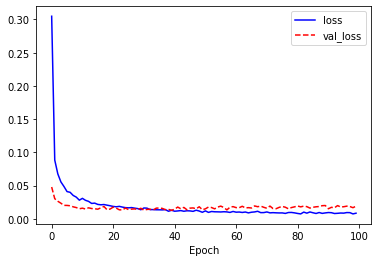

In [ ]:
## Plot losses
plt.plot(hist.history['loss'],'-b',label='loss')
plt.plot(hist.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

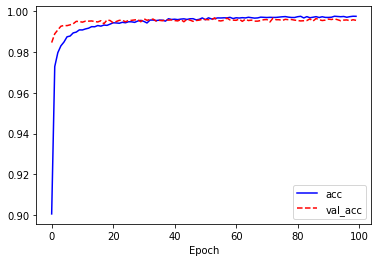

In [ ]:
## Plot Accuracy
plt.plot(hist.history['accuracy'],'b-',label='acc')
plt.plot(hist.history['val_accuracy'],'r--',label='val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_x, test_y, batch_size=batch_size)

50/50 [==============================] - 1s 11ms/step - loss: 0.0191 - accuracy: 0.9955


[0.019106078892946243, 0.9955000281333923]